In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('empl.csv')
df

,SNo,Name,Age,City,Salary
0,1,Tom,28.0,Toronto,20000.0
1,2,Lee,31.0,Edmonto,3900.0
2,3,Dave,34.0,Toronto,8000.0
3,4,Anik,26.0,HongKong,66672.0
4,5,kamal,30.0,BayArea,34344.0
5,6,Geet,22.0,HongKong,30007.0
6,7,Steven,43.0,BayArea,8300.0
7,8,Ram,38.0,Hyderabad,54666.0
8,9,hari,50.0,newyork,67666.0
9,11,yami,27.0,newyork,8888.0


In [3]:
df.shape

(18, 5)

In [4]:
df.tail()

,SNo,Name,Age,City,Salary
13,15,Steven,43.0,BayArea,8300.0
14,16,Ram,38.0,Hyderabad,54666.0
15,17,hari,NaN,newyork,67666.0
16,18,yami,27.0,newyork,8888.0
17,19,Lee,31.0,Edmonto,NaN


In [5]:
df.isnull().sum()

SNo       0
Name      0
Age       1
City      0
Salary    1
dtype: int64

In [6]:
df.dtypes

SNo         int64
Name       object
Age       float64
City       object
Salary    float64
dtype: object

In [7]:
df.describe()

,SNo,Age,Salary
count,18.000000,17.000000,17.000000
mean,10.000000,32.117647,33705.058824
std,5.790459,7.865132,24554.462953
min,1.000000,22.000000,3900.000000
25%,5.250000,27.000000,8888.000000
50%,10.000000,30.000000,30007.000000
75%,14.750000,38.000000,54666.000000
max,19.000000,50.000000,67666.000000


In [10]:
df['Salary'].fillna(df.groupby('City')['Salary'].transform('mean'),inplace=True)
df.tail()

,SNo,Name,Age,City,Salary
13,15,Steven,43.0,BayArea,8300.0
14,16,Ram,38.0,Hyderabad,54666.0
15,17,hari,0.0,newyork,67666.0
16,18,yami,27.0,newyork,8888.0
17,19,Lee,31.0,Edmonto,0.0


In [11]:
df.replace([np.NaN, -np.NaN], 0, inplace=True)


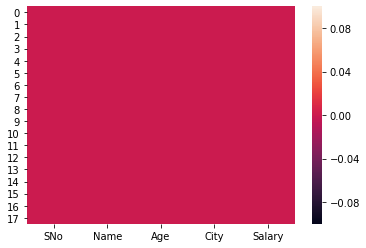

In [12]:
sns.heatmap(df.isnull())

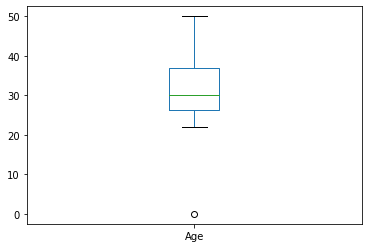

In [13]:
df['Age'].plot.box()

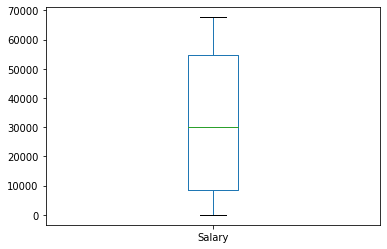

In [14]:
df['Salary'].plot.box()

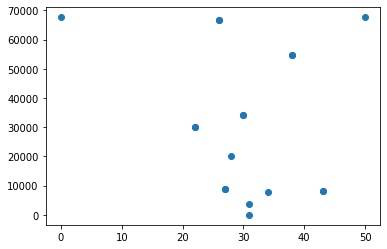

In [15]:
plt.scatter(df['Age'],df['Salary'])

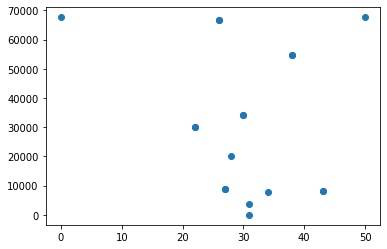

In [16]:
x=df['Age']
y=df['Salary']
plt.scatter(x,y)
plt.show()

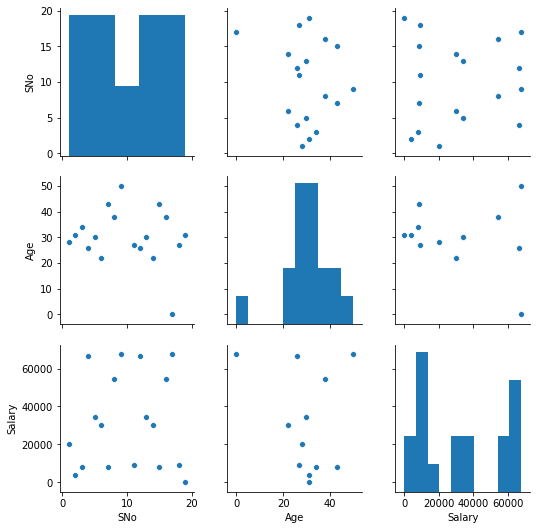

In [17]:
sns.pairplot(df)

<function matplotlib.pyplot.show(*args, **kw)>

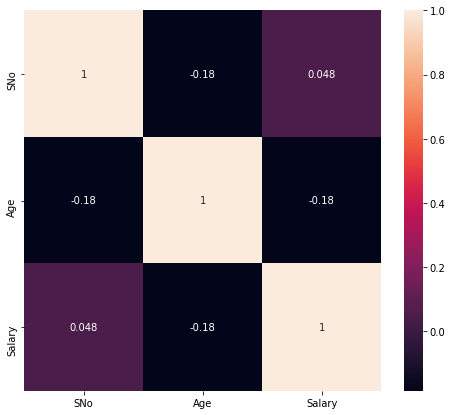

In [18]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show

In [19]:
x=df.iloc[:,2:-2].values
x

array([[28.],
       [31.],
       [34.],
       [26.],
       [30.],
       [22.],
       [43.],
       [38.],
       [50.],
       [27.],
       [26.],
       [30.],
       [22.],
       [43.],
       [38.],
       [ 0.],
       [27.],
       [31.]])

In [54]:
y=df.iloc[:,-1].values
y

array([20000.,  3900.,  8000., 66672., 34344., 30007.,  8300., 54666.,
       67666.,  8888., 66672., 34344., 30007.,  8300., 54666., 67666.,
        8888.,     0.])

In [55]:
y.shape

(18,)

In [56]:
x.shape

(18, 1)

In [57]:
y=y.reshape(-1,1)

In [58]:
y.shape

(18, 1)

In [59]:
y

array([[20000.],
       [ 3900.],
       [ 8000.],
       [66672.],
       [34344.],
       [30007.],
       [ 8300.],
       [54666.],
       [67666.],
       [ 8888.],
       [66672.],
       [34344.],
       [30007.],
       [ 8300.],
       [54666.],
       [67666.],
       [ 8888.],
       [    0.]])

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [70]:
x_train.shape

(12, 1)

In [71]:
x_test.shape

(6, 1)

In [72]:
y_test.shape

(6, 1)

In [73]:
y_train.shape

(12, 1)

In [74]:
lm=LinearRegression()


In [75]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lm.score(x,y)

-0.007453403771085831

In [77]:
lm.coef_

array([[-877.01170569]])

In [78]:
lm.intercept_

array([56657.2541806])

In [82]:
Slr=np.array([31])

In [83]:
sl=Slr.reshape(-1,1)

In [85]:
lm.predict(sl)

array([[29469.89130435]])

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [87]:
rf.score(x_train,y_train)

0.3711264948893951

In [88]:
Slr=np.array([31])
sl=Slr.reshape(-1,1)
rf.predict(sl)

array([13737.6])

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [90]:
knn.score(x_train,y_train)

0.04225164265676717

In [91]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [92]:
adb.score(x_train,y_train)

0.9994066975998337

In [94]:
Slr=np.array([50])
sl=Slr.reshape(-1,1)
adb.predict(sl)

array([8300.])

From Above Analysis we can say that after applying AdaBooster Regressor we get Accuracy score 99%.
But over all data is not unique certain missing or errors in the dataset are possible.